In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt
import torch as th

In [2]:
from tqdm.notebook import tqdm

In [3]:
from chromalab.observer import Observer, Cone
from chromalab.inks import Neugebauer, InkGamut, CellNeugebauer, Pigment, InkLibrary
from chromalab.spectra import Spectra, Illuminant

In [4]:
wavelengths1 = np.arange(390, 701, 1)
wavelengths10 = np.arange(400, 701, 10)

In [5]:
wavelengths4 = np.arange(380, 781, 4)

In [6]:
%load_ext autoreload
%autoreload 2

In [7]:
elevator_illuminant = Spectra(data=np.load(f'../data/illuminants/elevator.npy'),wavelengths=wavelengths4)\
.interpolate_values(wavelengths10)

In [8]:
s_m530_m533_q545_q547_l555_559 = Observer([Cone.s_cone(), Cone.cone(530), Cone.cone(533),\
                                           Cone.cone(545), Cone.cone(547), Cone.cone(555), Cone.cone(559)],
                                         illuminant=elevator_illuminant)

In [44]:
ishihara = {}
with open(f'../data/nix/28ishi.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        ishihara[name] = spectra
with open(f'../data/nix/26.csv') as csvf:
    spamreader = csv.reader(csvf, delimiter=';')
    for i, row in enumerate(spamreader):
        if i < 4: continue            
        name = row[4]
        color_data = np.array(row[33:],dtype=float)
        spectra = Spectra(data=color_data, wavelengths=wavelengths10)
        ishihara[name] = spectra

In [45]:
ishihara

{'H-in': <chromalab.spectra.Spectra at 0x2a811ff50>,
 'H-out': <chromalab.spectra.Spectra at 0x2a811f5d0>,
 'G-in': <chromalab.spectra.Spectra at 0x296af3cd0>,
 'G-out': <chromalab.spectra.Spectra at 0x296af3990>,
 'J-in': <chromalab.spectra.Spectra at 0x296af2d90>,
 'J-out': <chromalab.spectra.Spectra at 0x296af3c10>,
 'D-in': <chromalab.spectra.Spectra at 0x296af2fd0>,
 'D-out': <chromalab.spectra.Spectra at 0x296af2290>,
 'F-in': <chromalab.spectra.Spectra at 0x296af3290>,
 'F-out': <chromalab.spectra.Spectra at 0x296af24d0>,
 'I-in': <chromalab.spectra.Spectra at 0x296af1dd0>,
 'I-out': <chromalab.spectra.Spectra at 0x296af34d0>,
 'K-in': <chromalab.spectra.Spectra at 0x296af2810>,
 'K-out': <chromalab.spectra.Spectra at 0x296af35d0>,
 'C-in': <chromalab.spectra.Spectra at 0x296af3d50>,
 'C-out': <chromalab.spectra.Spectra at 0x296af3a90>,
 'B-in': <chromalab.spectra.Spectra at 0x296af3190>,
 'B-out': <chromalab.spectra.Spectra at 0x296af3d10>,
 'E-out': <chromalab.spectra.Spectra 

name 	  S	  M530	 M533	Q545   Q547   L555   L559       sum
A 	 [ 0.015  0.008  0.009  0.009  0.008  0.004  0.002]	0.01
L 	 [ 0.022  0.023  0.024  0.025  0.024  0.02   0.018]	0.041
E 	 [ 0.061  0.014  0.016  0.017  0.017  0.013  0.011]	0.025
B 	 [ 0.     0.032  0.03   0.029  0.03   0.034  0.036]	0.068
C 	 [ 0.009  0.007  0.006  0.004  0.004  0.006  0.008]	0.015
G 	 [ 0.021  0.025  0.028  0.033  0.033  0.032  0.031]	0.056
K 	 [ 0.026  0.018  0.02   0.025  0.025  0.024  0.023]	0.041
D 	 [ 0.039  0.028  0.03   0.034  0.034  0.033  0.032]	0.06
J 	 [ 0.028  0.027  0.029  0.033  0.033  0.032  0.031]	0.058
H 	 [ 0.011  0.013  0.015  0.019  0.02   0.019  0.018]	0.031
I 	 [ 0.024  0.009  0.007  0.003  0.003  0.004  0.005]	0.014
F 	 [ 0.022  0.009  0.011  0.015  0.015  0.014  0.012]	0.021


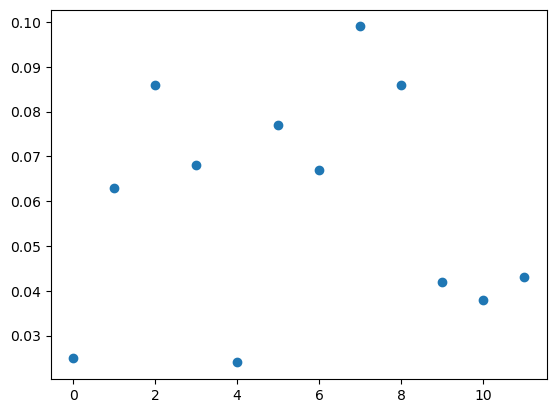

In [55]:
print("name", "\t", " S\t  M530\t M533\tQ545   Q547   L555   L559       sum")
items = list(ishihara.items())

name_stim = {}
for i in range(0, len(items) - 1, 2):
    key0, value0 = items[i]
    key1, value1 = items[i + 1]
    stim0 = s_m530_m533_q545_q547_l555_559.observe(value0)
    stim1 = s_m530_m533_q545_q547_l555_559.observe(value1)
    
    
    delta = np.round(np.abs(stim1 - stim0),3)
    name_stim[key0[0]] = delta
    
    
xs = []
ys = []
for i, letter in enumerate(["A", "L", "E", "B", "C", "G", "K", "D", "J", "H", "I", "F"]):
    delta = name_stim[letter]
    
    print(letter, "\t", delta, end="\t")
    print(delta[1] + delta[-1])
    xs.append(i)
    ys.append(delta[0] + delta[1] + delta[-1])
    
plt.scatter(xs,ys)


In [56]:
np.corrcoef(xs,ys)

array([[ 1.        , -0.01509893],
       [-0.01509893,  1.        ]])